In [3]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, execute, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.circuit.library import MCMT, ZGate, mcrz
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi

from qiskit_ibm_provider import IBMProvider
import qiskit_ibm_provider

#import seaborn
import numpy as np

#providera = IBMProvider()

In [4]:
pi = np.pi
            
def sv_simulate_circuit(qc):            
    backend = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use 
    job = execute(qc,backend) # Put in the name of your quantum circuit where it says qc
    result = job.result() 

    state = np.asarray(result.get_statevector())
    
    amplitude_list = []
    for amplitude in state:
        amplitude_list.append(np.round(amplitude,3))
        
    return amplitude_list

def aer_simulate_circuit(qc):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc,backend, shots = 1024)
    result = job.result()         
    return result.get_counts()

In [5]:
#Varying input bitstring (dependent on whether f(x) is constant or balanced

#Flipping 1st and 3rd qubits; Expect spike on `0101` [Little Endian ordering] ==> Balanced Oracle
def input_variation1(qc):
    qc.x(0)
    qc.x(2)
    return qc

#Flipping 2nd qubit; Expect spike on `0010` ==> Balanced Oracle
def input_variation2(qc):
    qc.x(1)
    return qc

#NO CHANGE; Expect spike on `0000` ==> Constant Oracle
def input_variation3(qc):
    return qc

In [8]:
qreg = QuantumRegister(4)
creg = ClassicalRegister(4)
output = AncillaRegister(1) 

qc = QuantumCircuit(qreg, output, creg)

## DIFFERENT INPUTS

qc = input_variation1(qc)
#qc = input_variation2(qc)
#qc = input_variation3(qc)

## DEUTSCH-JOZSA ALGORITHM
qc.barrier()
for i in range(4): qc.h(i) #Cascade Hadamard
qc.x(output) #Negating output qubit
qc.mcp(-pi, [i for i in range(4)], 4) #Multi-controlled Z (Phase) gate
for i in range(4): qc.h(i) #Cascade Hadamard
qc.measure([i for i in range(4)], [i for i in range(4)]) #Measure all input qubits

In [9]:
qc.draw()

┌───┐ ░ ┌───┐        ┌───┐┌─┐         
q1_0: ┤ X ├─░─┤ H ├─■──────┤ H ├┤M├─────────
      └───┘ ░ ├───┤ │      ├───┤└╥┘┌─┐      
q1_1: ──────░─┤ H ├─■──────┤ H ├─╫─┤M├──────
      ┌───┐ ░ ├───┤ │      ├───┤ ║ └╥┘┌─┐   
q1_2: ┤ X ├─░─┤ H ├─■──────┤ H ├─╫──╫─┤M├───
      └───┘ ░ ├───┤ │      ├───┤ ║  ║ └╥┘┌─┐
q1_3: ──────░─┤ H ├─■──────┤ H ├─╫──╫──╫─┤M├
            ░ ├───┤ │P(-π) └───┘ ║  ║  ║ └╥┘
  a1: ──────░─┤ X ├─■────────────╫──╫──╫──╫─
            ░ └───┘              ║  ║  ║  ║ 
c1: 4/═══════════════════════════╩══╩══╩══╩═
                                 0  1  2  3

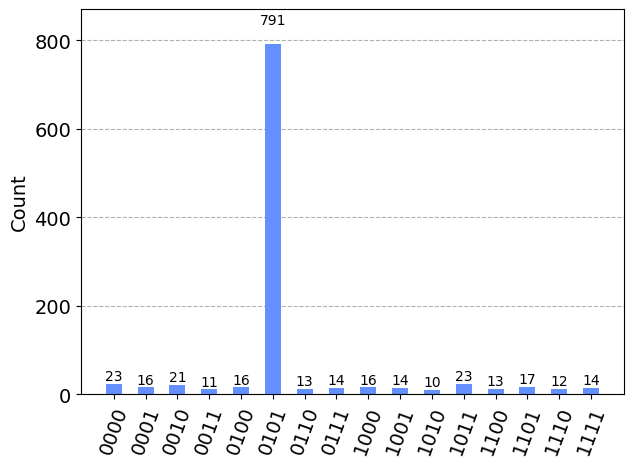

In [10]:
aer_simulate_circuit(qc)

plot_histogram(aer_simulate_circuit(qc))